In [4]:

import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Sunderland\Data\WyScout\Top 5 EU Leagues\Forwards.csv')

In [40]:
df.head()

,Player,Team,Fouls,Yellow cards,Attacking Actions,Goals,xG,Shots,Assists,xA,Crosses,Dribbles,Touches in box,Progressive Runs,Received passes,Passes,Smart passes,Key passes
0,Lautaro Martínez,Internazionale,2.05,0.18,4.17,0.51,0.63,3.53,0.15,0.14,1.13,4.40,6.01,1.20,15.01,18.64,0.66,0.56
1,D. Zapata,Atalanta,1.24,0.00,5.66,0.57,0.58,3.23,0.21,0.19,2.48,6.82,7.06,1.91,19.15,27.27,0.62,0.80
2,Iñaki Williams,Athletic Bilbao,0.77,0.05,3.12,0.16,0.22,1.78,0.16,0.12,2.35,4.02,3.96,1.86,13.88,18.97,0.74,0.57
3,José Luis Morales,Levante,0.77,0.11,4.33,0.46,0.22,1.88,0.09,0.18,3.08,4.50,3.73,2.11,18.22,22.98,1.45,0.48
4,Á. Correa,Atlético Madrid,1.35,0.09,4.17,0.26,0.24,1.58,0.20,0.17,1.70,4.89,4.66,0.92,22.89,30.83,1.24,0.75


In [41]:
#Create a parameter list
params = list(df.columns)
params

['Player',
 'Team',
 'Fouls',
 'Yellow cards ',
 'Attacking Actions ',
 'Goals ',
 'xG',
 'Shots ',
 'Assists',
 'xA ',
 'Crosses',
 'Dribbles',
 'Touches in box',
 'Progressive Runs',
 'Received passes ',
 'Passes',
 'Smart passes',
 'Key passes ']

In [42]:
#drop the first 3 list item becuase we will not be using player,index, or 90s as a comparison metric
params = params[2:]
params

['Fouls',
 'Yellow cards ',
 'Attacking Actions ',
 'Goals ',
 'xG',
 'Shots ',
 'Assists',
 'xA ',
 'Crosses',
 'Dribbles',
 'Touches in box',
 'Progressive Runs',
 'Received passes ',
 'Passes',
 'Smart passes',
 'Key passes ']

# CHANGE PLAYER HERE

In [43]:
df.Player.values

array(['Lautaro Martínez', 'D. Zapata', 'Iñaki Williams',
       'José Luis Morales', 'Á. Correa', 'M. Barrow', 'Y. En-Nesyri',
       'R. Malinovskiy', 'Portu', 'Marcos Llorente', 'João Pedro',
       'D. Kulusevski', 'A. Belotti', 'L. Muriel', 'Kike García',
       'L. Insigne', 'M. Politano', 'J. Bowen', 'R. Lukaku', 'K. Lasagna',
       'Joselu', 'L. Messi', 'Heung-Min Son', 'C. Immobile',
       'M. Zaccagni', 'M. Rashford', 'R. Palacio', 'Moi Gómez',
       'Adama Traoré', 'G. Simeone', 'C. Biraghi', 'Roberto Firmino',
       'Mohamed Salah', 'K. Benzema', 'Vinícius Júnior', 'L. de Jong',
       'L. Ocampos', 'D. Vlahović', 'Asier Villalibre', 'Suso', 'H. Kane',
       'Borja Mayoral', 'Raúl García', 'C. Adams', 'Mikel Oyarzabal',
       'A. Isak', 'J. Stryger Larsen', 'S. Mané', 'Marco Asensio',
       'S. Verdi', 'Cristiano Ronaldo', 'Santi Mina', 'Brais Méndez',
       'Iago Aspas', 'Rubén García', 'N. Fekir', 'Roger Martí',
       'C. Lykogiannis', 'Jorge Molina', 'L. Suárez'

In [44]:
# Now we filter the df for the player we want. We will look at ruben dias. 
# The player needs to be spelled exactly the same way as it is in the data. Accents and everything.
player = df.loc[df['Player']=="J. Vardy"].reset_index()
player = list(player.loc[0])
print(player)

[63, 'J. Vardy', 'Leicester City', 0.67, 0.02, 2.53, 0.44, 0.53, 2.25, 0.16, 0.13, 0.96, 2.34, 4.25, 0.99, 9.76, 11.5, 0.39, 0.67]


In [45]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

16
19 None
16
16 None


In [46]:
player

[0.67,
 0.02,
 2.53,
 0.44,
 0.53,
 2.25,
 0.16,
 0.13,
 0.96,
 2.34,
 4.25,
 0.99,
 9.76,
 11.5,
 0.39,
 0.67]

In [47]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [48]:
round(stats.percentileofscore(df[params[0]],player[0]))

13

In [49]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

#### Defending slice - (#1A78CF) text - (#000000)
#### Discipline slice - (#00B050) text - (#000000)
#### Attacking slice - (#FF9300) text - (#000000)
#### Possession slice - (#D70232) text - (#F2F2F2)


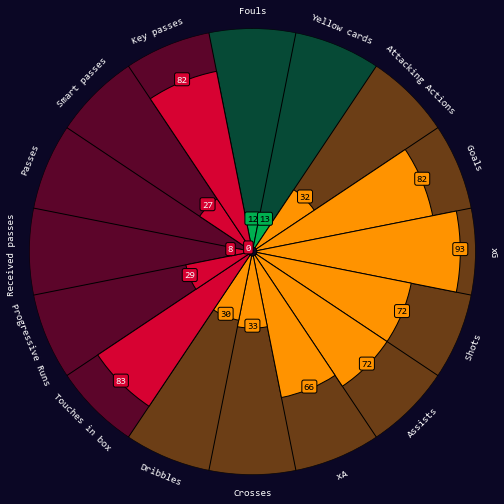

In [52]:
# color for the slices and text
slice_colors = ["#00B050"] * 2 + ["#FF9300"] * 8 + ["#D70232"] * 6 
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 6

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#0B0725",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=2            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="white", fontsize=10,font='consolas',
        va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=10,font='consolas',
        bbox=dict(
            edgecolor="#000000", facecolor="#1B1B1B",
            boxstyle="round,pad=0.2", lw=1
            
        )
    )                                
)

plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')